In [1]:
# 导入os
import os
# 当os.environ["TF_CPP_MIN_LOG_LEVEL"]=0的时候，输出信息：INFO + WARNING + ERROR + FATAL
# 当os.environ["TF_CPP_MIN_LOG_LEVEL"]=1的时候，输出信息：WARNING + ERROR + FATAL
# 当os.environ["TF_CPP_MIN_LOG_LEVEL"]=2的时候，输出信息：ERROR + FATAL
# 当os.environ["TF_CPP_MIN_LOG_LEVEL"]=3的时候，输出信息：FATAL
os.environ["TF_MIN_CPP_LEVEL_LOG"] = "2"

# 导入opencv
import cv2

# 导入time，用来打时间戳
import time

# 导入random，生成随机数
import random

# 导入numpy，数值计算库
import numpy as np

# 导入 tqdm，用于显示进度条
from tqdm import tqdm

# 导入 matplotlib，画图库
from matplotlib import pyplot as plt

# 导入 pathlib，文件路径库
from pathlib import Path

In [2]:
# 导入tensorflow 
import tensorflow as tf

# 导入keras.utils,一些绘制 Keras 模型的实用功能
from tensorflow.keras.utils import plot_model

# 导入kears.models,加载模型的库
from tensorflow.keras.models import load_model
# from tensorflow.keras.datasets import cifar10

# 导入图像增强
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 导入时序容器
from tensorflow.keras.models import Sequential

# 导入一些必要的算子
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, AveragePooling2D, MaxPool2D, MaxPooling2D,LayerNormalization, BatchNormalization

tf.__version__

'2.9.1'

In [3]:
# 数据集文件夹
DATADIR = '../Dataset/faces/train'

# 数据分类
CATEGORIES = ['man','woman']

# 图像尺寸
IMG_SIZE = 64

In [4]:
def create_training_data():
    training_data = []
    for category in CATEGORIES:  
        # print(category)
        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=C 1=O
        # print(class_num)
        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                # 强调！！！！
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                
                # resize
                # 问题，为什么选择64？
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                
                # 加入training_data队列
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
              
    return training_data

training_data = create_training_data()

100%|██████████| 8274/8274 [00:08<00:00, 1018.67it/s]


data numbers: 24892
1
(64, 64, 3)


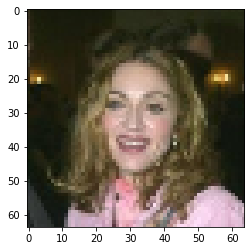

0
(64, 64, 3)


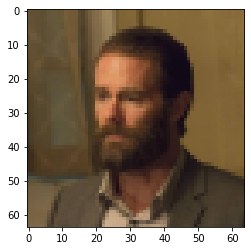

0
(64, 64, 3)


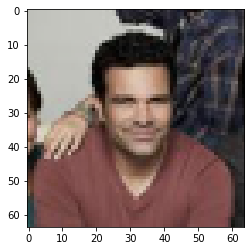

1
(64, 64, 3)


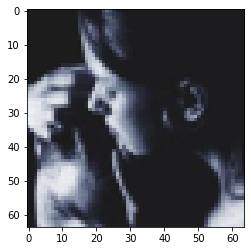

0
(64, 64, 3)


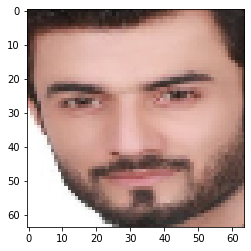

In [5]:
# 查看训练数据长度
print(f"data numbers: {len(training_data)}")

# 一个列表中的元素打乱顺序
random.shuffle(training_data)

#输出前5个训练数据，查看是否正确匹配
for sample in training_data[:5]:
    print(sample[1])
    print(sample[0].shape)
    plt.imshow(sample[0])
    plt.show()
    

In [6]:
X = []
Y = []

# 输出标签和训练集
for features, label in training_data:
    X.append(features)
    Y.append(label)
    
# reshape
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

# 归一化
# 问题：为什么归一化？
X = X/255.0

Y = np.array(Y)
X.shape

(24892, 64, 64, 3)

In [7]:
# # 数据增强 参考ImageDataGenerator
# # # set up image augmentation

# datagen = ImageDataGenerator(
#     rotation_range=15,
#     horizontal_flip=True,
#     width_shift_range=0.1,
#     height_shift_range=0.1
#     #zoom_range=0.3
#     )
# Y =datagen.fit(X)

In [8]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=2, activation = 'softmax'))

# 选择损失函数
# 选择优化器
# 精度评估选项
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# print(X.shape[1:])

# model.summary()

In [9]:
# 开始训练
# 注意：batch_size和epochs
# validation选择0-1之间
history = model.fit(X, Y, batch_size=32, epochs=50-, validation_split=0.1)
# model.fit_generator(datagen.flow(X, Y, batch_size=32),
#                     epochs=100,
#                     verbose=1)


Epoch 1/50
701/701 [==============================] - 36s 47ms/step - loss: 0.5030 - accuracy: 0.7493 - val_loss: 0.4202 - val_accuracy: 0.7964
Epoch 2/50
701/701 [==============================] - 34s 49ms/step - loss: 0.4277 - accuracy: 0.7989 - val_loss: 0.3804 - val_accuracy: 0.8233
Epoch 3/50
701/701 [==============================] - 37s 53ms/step - loss: 0.3967 - accuracy: 0.8183 - val_loss: 0.3405 - val_accuracy: 0.8470
Epoch 4/50
701/701 [==============================] - 33s 47ms/step - loss: 0.3683 - accuracy: 0.8325 - val_loss: 0.3494 - val_accuracy: 0.8474
Epoch 5/50
701/701 [==============================] - 33s 47ms/step - loss: 0.3490 - accuracy: 0.8458 - val_loss: 0.3200 - val_accuracy: 0.8622
Epoch 6/50
701/701 [==============================] - 36s 51ms/step - loss: 0.3385 - accuracy: 0.8517 - val_loss: 0.2803 - val_accuracy: 0.8815
Epoch 7/50
701/701 [==============================] - 44s 63ms/step - loss: 0.3217 - accuracy: 0.8616 - val_loss: 0.2863 - val_accuracy:

In [10]:
# 保存.h5文件
model.save('../Models/gender.h5')

In [11]:
model = tf.keras.models.load_model("../Models/gender.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
 
tflite_model = converter.convert()
#创建一个文件，将tflite模型写入文件
open("../Models/gender.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\27491\AppData\Local\Temp\tmp9_pkvpj8\assets


INFO:tensorflow:Assets written to: C:\Users\27491\AppData\Local\Temp\tmp9_pkvpj8\assets


2591648

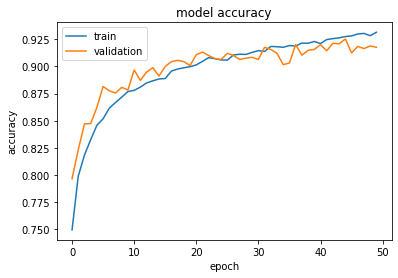

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

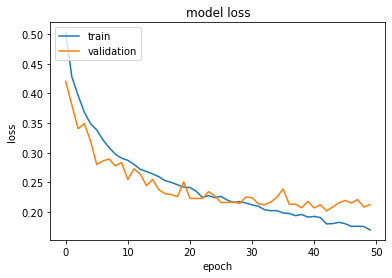

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

TypeError: Image data of dtype object cannot be converted to float

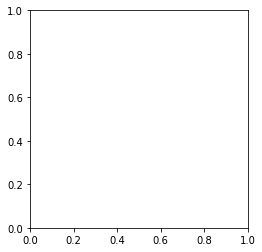

In [26]:
# 单个测试样本数据
test_path = "../Dataset/faces/test/train/man/man_16618.jpg"
image = cv2.imread(test_path)
#展示测试样本
plt.imshow(image)
plt.show()
image = cv2.resize(image, (64, 64))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_bn = image.astype("float32") / 255.0
image = np.expand_dims(image, axis=0)
image_bn = np.expand_dims(image_bn, axis=0)

In [17]:
# 恢复 keras 模型，并预测
keras_file = '../Models/gender.h5'
model = tf.keras.models.load_model(keras_file)
# model.summary()
# tf.autograph.set_verbosity(0)

start_time = time.time()
pred = model.predict(image_bn)
stop_time = time.time()

print(f"prediction: {pred}")
print('time: {:.3f}ms'.format((stop_time - start_time) * 1000))
print("model size: {:.2f} MB".format(os.path.getsize(keras_file)/1024/1024))

NameError: name 'image_bn' is not defined

In [ ]:
# plot_model(model, to_file='model_small.png', show_layer_names=False, show_shapes=True)

In [18]:
interpreter = tf.lite.Interpreter(model_content=tflite_model)
input_type = interpreter.get_input_details()[0]['dtype']
print('input: ', input_type)
output_type = interpreter.get_output_details()[0]['dtype']
print('output: ', output_type)

input:  <class 'numpy.float32'>
output:  <class 'numpy.float32'>


In [22]:
# quantize int

def representative_data_gen():
  for input_value in X[:100]:
    input_value = np.expand_dims(input_value, axis=0)
    input_value = input_value.astype(np.float32)
    yield [input_value]

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
# Ensure that if any ops can't be quantized, the converter throws an error

tflite_model = converter.convert()

#创建一个文件，将tflite模型写入文件
open("../Models", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\27491\AppData\Local\Temp\tmpfg3e5bbv\assets


INFO:tensorflow:Assets written to: C:\Users\27491\AppData\Local\Temp\tmpfg3e5bbv\assets
c:\Users\27491\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


PermissionError: [Errno 13] Permission denied: '../Models'

In [24]:
# tflite 模型推理

interpreter = tf.lite.Interpreter(model_path="../Models")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()[0]
output_details = interpreter.get_output_details()[0]

interpreter.set_tensor(input_details['index'], image_bn)

start_time = time.time()
interpreter.invoke()
stop_time = time.time()

output_data = interpreter.get_tensor(output_details['index'])
print(f"prediction: {output_data}")
print('time: {:.3f}ms'.format((stop_time - start_time) * 1000))
print("model size: {:.2f} MB".format(os.path.getsize("../Models")/1024/1024))

ValueError: Could not open '../Models'.

In [ ]:
print(X[:100].shape)

(100, 64, 64, 3)


In [25]:
# quantize int

def representative_data_gen():
  for input_value in X[:100]:
    input_value = np.expand_dims(input_value, axis=0)
    input_value = input_value.astype(np.float32)
    yield [input_value]

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
# Ensure that if any ops can't be quantized, the converter throws an error
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# Set the input and output tensors to uint8 (APIs added in r2.3)
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

tflite_model = converter.convert()

tflite_file = Path("../Models")
tflite_file.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\27491\AppData\Local\Temp\tmpzz1n6yog\assets


INFO:tensorflow:Assets written to: C:\Users\27491\AppData\Local\Temp\tmpzz1n6yog\assets
c:\Users\27491\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


PermissionError: [Errno 13] Permission denied: '..\\Models'

In [ ]:
interpreter = tf.lite.Interpreter(model_content=tflite_model)
input_type = interpreter.get_input_details()[0]['dtype']
print('input: ', input_type)
output_type = interpreter.get_output_details()[0]['dtype']
print('output: ', output_type)

input:  <class 'numpy.uint8'>
output:  <class 'numpy.uint8'>


In [ ]:
# tflite 模型推理
tflite_file = Path("../Models/Tflites/gender_int.tflite")
interpreter = tf.lite.Interpreter(model_path="../Models/Tflites/gender_int.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()[0]
output_details = interpreter.get_output_details()[0]

interpreter.set_tensor(input_details['index'], image)

start_time = time.time()
interpreter.invoke()
stop_time = time.time()

output_data = interpreter.get_tensor(output_details['index'])
print(f"prediction: {output_data}")
print('time: {:.3f}ms'.format((stop_time - start_time) * 1000))
print("model size: {:.2f} MB".format(os.path.getsize("../Models/Tflites/gender_int.tflite")/1024/1024))

prediction: [[253   3]]
time: 83.040ms
model size: 0.63 MB
